# ZOMATO - Data Analysis Project

----------------------------------------------------------------------------

# Step 1 : Importing Libraries

pandas - used for data manipulation and analysis

numpy - used for numerical operations

matplotlib.pyplot and seaborn - used for data visualization

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2 : Create the dataframe

In [24]:
dataframe = pd.read_csv("ZomatoData.csv")
print(dataframe)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [28]:
# Convert datatype of column - rate

def handleRate(value):
    value = str(value).split('/')
    value = value[0]
    return float(value)

dataframe["rate"] = dataframe["rate"].apply(handleRate)
dataframe


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [30]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


# Questions

In [41]:
# Type of restaurant

# Q1. What type of restaurant do the majority of customers order from?

dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'type of restaurant')

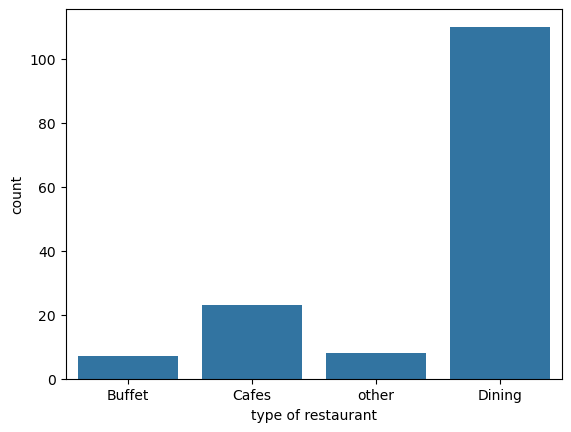

In [54]:
sns.countplot(x=dataframe["listed_in(type)"])
plt.xlabel("type of restaurant")

Ans - Dining type of restaurant do the majority of customers order from

--------------------------------------------------------------

In [56]:
# Q2. How many votes has each type of restaurant received from customers?

dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'Votes')

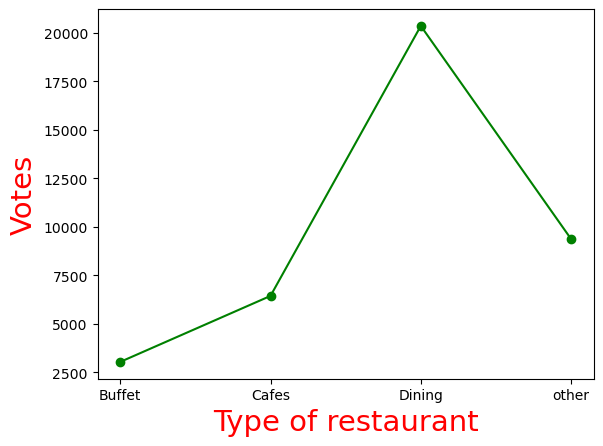

In [84]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c = 'green', marker = 'o')

plt.xlabel("Type of restaurant", c = 'red', size = 21)
plt.ylabel("Votes", c = 'red', size = 21)

In [86]:
# Ans - 
# 1. Dining = 20000+
# 2. Other = 7500 - 10000
# 3. Cafes = 5000 - 7500
# 4. Buffet = 2500 - 5000

In [92]:
# Q3. What are the ratings that the majority of restaurants have received?

dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


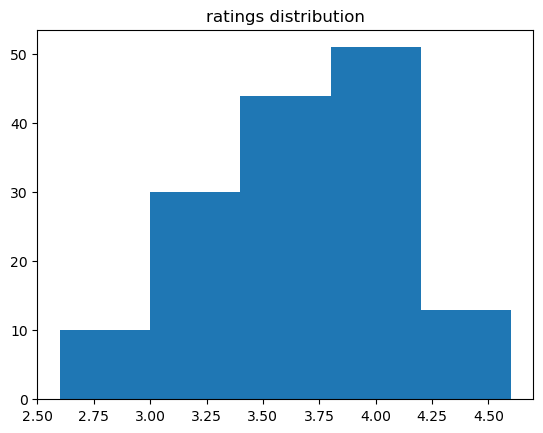

In [102]:
plt.hist(dataframe['rate'], bins = 5)
plt.title("ratings distribution")
plt.show()

Ans - Majority of restaurant received rating from 3.5 - 4.0

In [108]:
# 4. Zomato has observed that most couples order most of their food online. What is their 
# average spending on each order?

dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

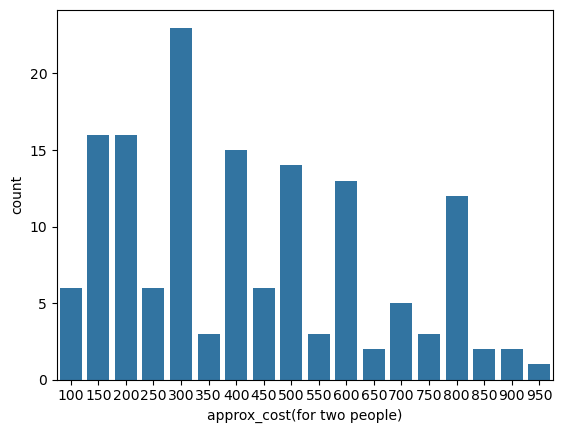

In [110]:
couple = dataframe[('approx_cost(for two people)')]
sns.countplot(x=couple)

Ans - Average spend by the couple = 300

In [113]:
# Q5. Which mode (online or offline) has received the maximum rating?

dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

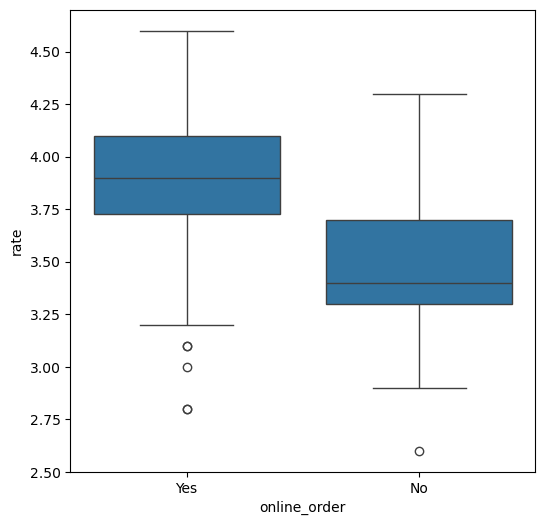

In [115]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Ans - 

Online order received more rating

Offline order received less rating

In [124]:
# Q6. Which type of restaurant received more offline orders, so that Zomato can provide those 
# customers with some good offers

dataframe.head()


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


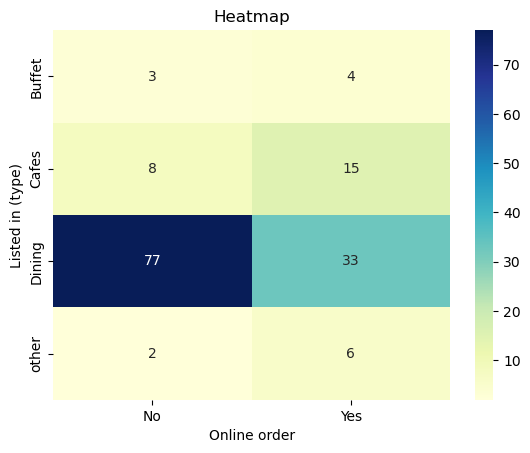

In [126]:
pivot_table = dataframe.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title("Heatmap")
plt.xlabel("Online order")
plt.ylabel("Listed in (type)")
plt.show()

Ans - Dining restaurant received more offline orders